# London Bike Sharing Data Exploration
## by Beijia(Frances) Yu 

## Preliminary Wrangling

> * I found this dataset on Kaggle. It has data on bike sharing in London from 2015 to 2016. The data in this dataset was acquired from 3 resources
>   * [Https://cycling.data.tfl.gov.uk/ ](Https://cycling.data.tfl.gov.uk/ ) 'Contains OS data © Crown copyright and database rights 2016' and Geomni UK Map data © and database rights [2019] 'Powered by TfL Open Data'
>   * [https://ca.freemeteo.com/](https://ca.freemeteo.com/) - weather data
>   * [https://www.gov.uk/bank-holidays](https://www.gov.uk/bank-holidays) From 1/1/2015 to 31/12/2016
> * For an explanation of the columns see the link:
[https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset)
> * I made some modifications on the data, including changing data types of several columns, adding more columns based on existing data as well as renaming some columns etc. The process is documented in the wrange_final.ipynb

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
data_dir = './data'

In [3]:
data_file = os.path.join(data_dir, 'london.csv')

df = pd.read_csv(data_file, index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         17414 non-null  object 
 1   shared_counts     17414 non-null  int64  
 2   real_temperature  17414 non-null  float64
 3   temperature       17414 non-null  float64
 4   humidity          17414 non-null  float64
 5   wind_speed        17414 non-null  float64
 6   weather_code      17414 non-null  int64  
 7   is_holiday        17414 non-null  bool   
 8   is_weekend        17414 non-null  bool   
 9   season_code       17414 non-null  int64  
 10  date              17414 non-null  object 
 11  year              17414 non-null  int64  
 12  season            17414 non-null  object 
dtypes: bool(2), float64(4), int64(4), object(3)
memory usage: 1.6+ MB


### What is the structure of your dataset?

> In this dataset, it contains 17414 records. It includes the following data types: string, integer, float and boolean. Some variables describe the weather condition: real_temperature, humidity as well as wind_speed. Some are about when the sharing was happening: timestamp, is_holiday, is_weekend, season_code, date, year, season.

### What is/are the main feature(s) of interest in your dataset?

> shared_counts: the count of a new bike shares 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * weather condition: real_temperature, humidity, wind_speed
> * when the sharing is happening: weather_code, is_holiday, is_weekend, season_code, date, year, season

---
---
---

In [5]:
current_palette = sns.color_palette("colorblind")

sns.set_palette(current_palette)

base_color=current_palette[0]

In [6]:
df_tmp = df.copy()

df_tmp['weather_code'] = df['weather_code'].astype(str)
df_tmp['season_code'] = df['season_code'].astype(str)
df_tmp['year'] = df['year'].astype(str)

---
---
---

## Univariate Exploration

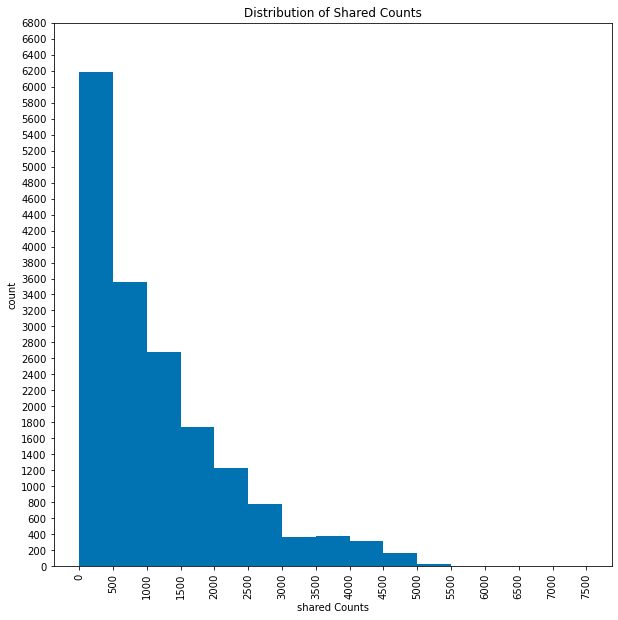

In [7]:
plt.rcParams['figure.figsize'] = (10, 10)

bins = np.arange(0, 7860, 500)

y_pos = np.arange(0, 7000, 200)

plt.hist(df['shared_counts'], bins=bins)

plt.xticks(bins, rotation=90)
plt.yticks(y_pos)

plt.xlabel('shared Counts')
plt.ylabel('count')

plt.title('Distribution of Shared Counts')

plt.show()

> Shared counts has a right-skewed distribution. 
> 
> * 0-500: 6200
> * 500-1000: 3600
> * 1000-1500: 2700

---

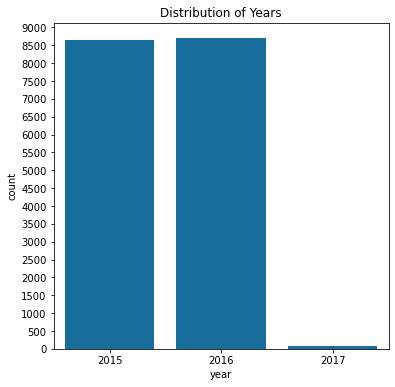

In [8]:
plt.rcParams['figure.figsize'] = (6, 6)

y_pos = np.arange(0, 9000+500, 500)

sns.countplot(
    x="year", 
    data=df, 
    color=base_color
)

plt.yticks(y_pos)

plt.title('Distribution of Years')

plt.show()

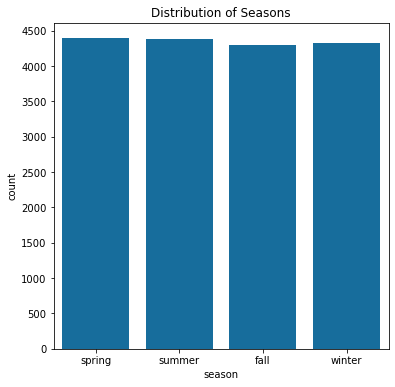

In [9]:
plt.rcParams['figure.figsize'] = (6, 6)

y_pos = np.arange(0, 4500+500, 500)

sns.countplot(
    x="season", 
    data=df, 
    order=['spring', 'summer', 'fall', 'winter'],
    color=base_color
)

plt.yticks(y_pos)

plt.title('Distribution of Seasons')

plt.show()

> This dataset contains equal number of sharings for 2015 and 2016 as well as for four seasons

---

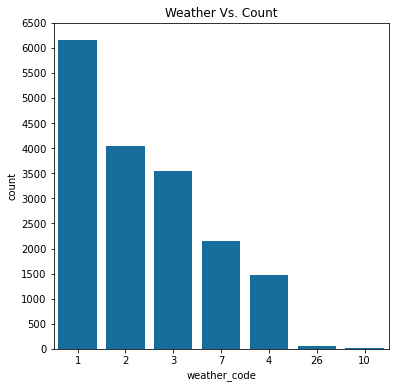

In [10]:
plt.rcParams['figure.figsize'] = (6, 6)

y_pos = np.arange(0, 6500+500, 500)

sns.countplot(
    x='weather_code', 
    data=df_tmp, 
    order=df_tmp['weather_code'].value_counts().index,
    color=base_color
)

plt.yticks(y_pos)

plt.title('Weather Vs. Count')

plt.show()

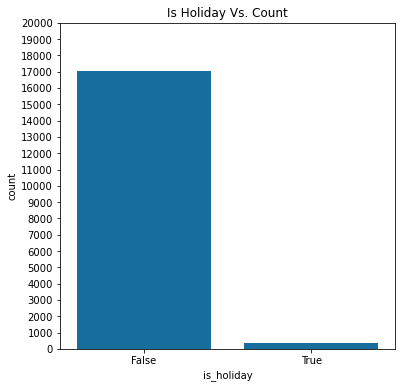

In [11]:
plt.rcParams['figure.figsize'] = (6, 6)

y_pos = np.arange(0, 20000+1000, 1000)

sns.countplot(x="is_holiday", data=df, color=base_color)

plt.yticks(y_pos)

plt.title('Is Holiday Vs. Count')

plt.show()

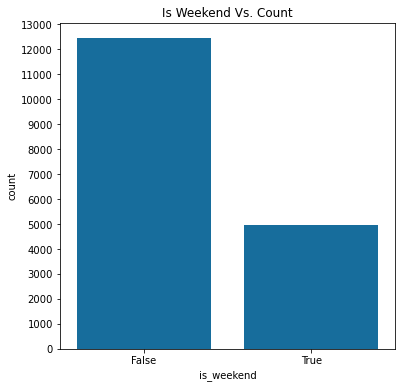

In [12]:
plt.rcParams['figure.figsize'] = (6, 6)

y_pos = np.arange(0, 12500+1000, 1000)

sns.countplot(x="is_weekend", data=df, color=base_color)

plt.yticks(y_pos)

plt.title('Is Weekend Vs. Count')

plt.show()

> * Most bike sharings happened when
>  * the weather was mostly clear
>  * it was not a holiday season
>  * it was not weekend

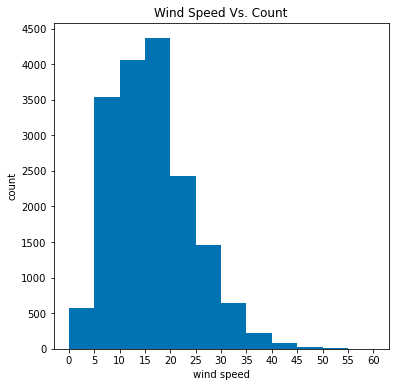

In [13]:
plt.rcParams['figure.figsize'] = (6, 6)

y_pos = np.arange(0, 4500+500, 500)
bins = np.arange(0, 56.5+5, 5)

plt.hist(df['wind_speed'], color=base_color, bins=bins)

plt.xticks(bins)
plt.yticks(y_pos)

plt.xlabel('wind speed')
plt.ylabel('count')

plt.title('Wind Speed Vs. Count')

plt.show()

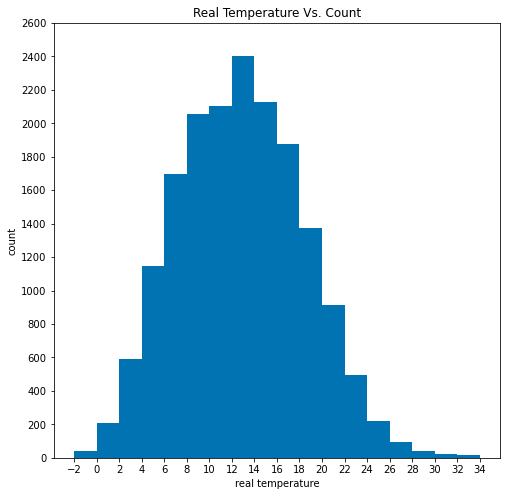

In [14]:
plt.rcParams['figure.figsize'] = (8, 8)

y_pos = np.arange(0, 2500+200, 200)
bins = np.arange(-2, 34+2, 2)

plt.hist(df['real_temperature'], color=base_color, bins=bins)

plt.xticks(bins)
plt.yticks(y_pos)

plt.xlabel('real temperature')
plt.ylabel('count')

plt.title('Real Temperature Vs. Count')

plt.show()

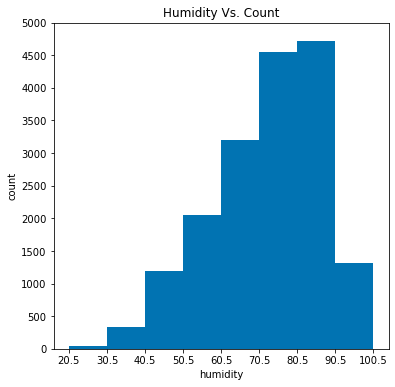

In [15]:
plt.rcParams['figure.figsize'] = (6, 6)

y_pos = np.arange(0, 5000+500, 500)
bins = np.arange(20.5, 100+10, 10)

plt.hist(df['humidity'], color=base_color, bins=bins)

plt.xticks(bins)
plt.yticks(y_pos)

plt.xlabel('humidity')
plt.ylabel('count')

plt.title('Humidity Vs. Count')

plt.show()

> * Most bike sharings happened when
>  * Wind speed: 5 ~ 20 km/h
>  * Real temperature: 8 - 18 Celcius
>  * Humidity: 70.5% - 90.5%

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * Right skewed distribution
> * No. I did not need to perform any transformations on the data.
> * However, I adjusted the xticks and yticks to get more information from the graph

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> * Interestingly, people on their vocation highly unlikely shared bike. 
> * There was no many bike sharing happened in bad weather conditions
> * No.

## Bivariate Exploration

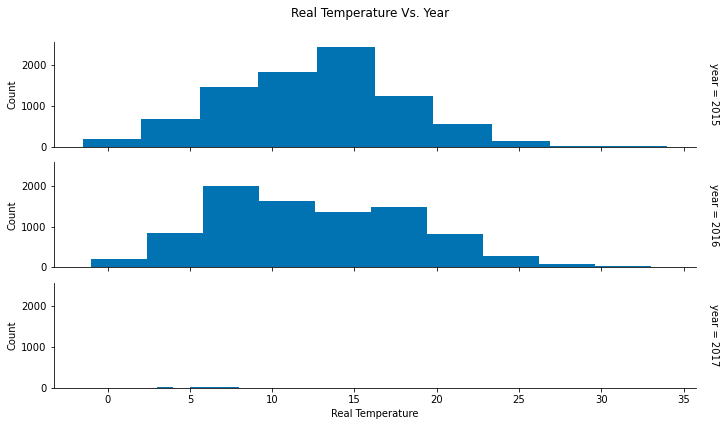

In [16]:
g = sns.FacetGrid(df, row="year", height=2, aspect=5, margin_titles=True)
g = g.map(plt.hist, "real_temperature")

g.fig.suptitle('Real Temperature Vs. Year')
g.fig.subplots_adjust(top=0.9)

g.set_axis_labels(x_var="Real Temperature", y_var="Count")

plt.show()

> * For certain range of temperature, distributions of counts does change: 6 - 18 Celcius
> * For other ranges, the distributions are about the same

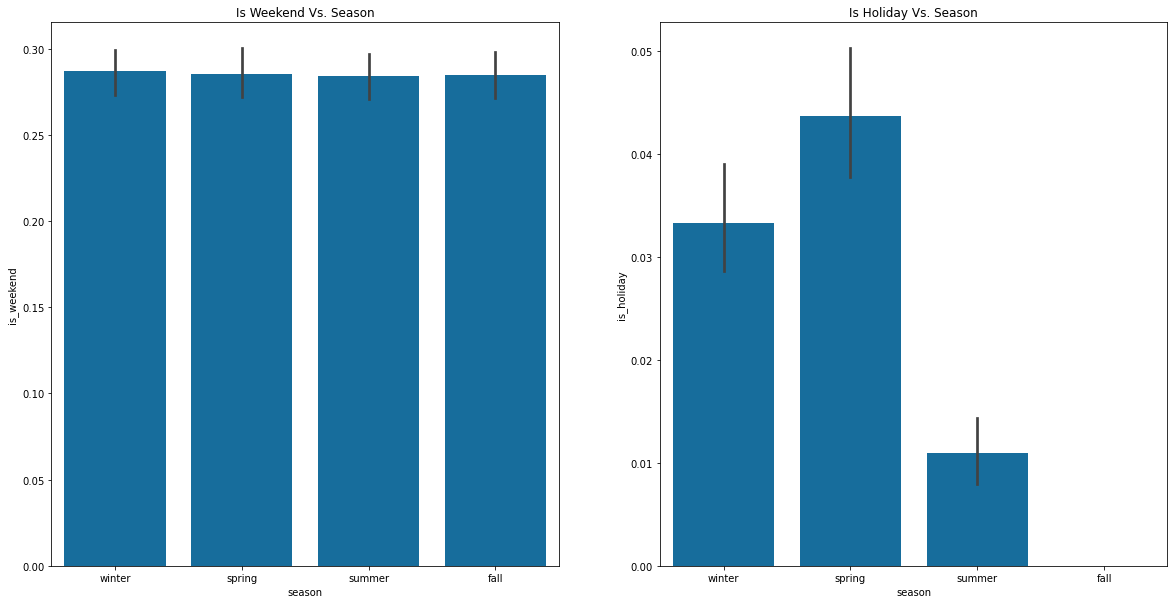

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x="season", y="is_weekend", data=df, color=base_color, ax=axes[0])
sns.barplot(x="season", y="is_holiday", data=df, color=base_color, ax=axes[1])

axes[0].set_title('Is Weekend Vs. Season')
axes[1].set_title('Is Holiday Vs. Season')

plt.show()

> * The count of is_weekend over season is uniformly distributed whereas the count of is_holiday over season has a right-skewed distribution.
> * Season has no impacts on bike sharing disribution resulting from whether it is weekend or not.
> * Season does affect bike sharing distribution resulting from whether it is holiday or not

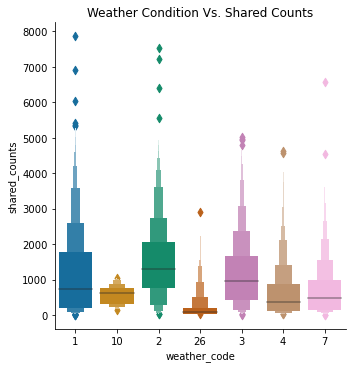

In [18]:
sns.catplot(x='weather_code', y='shared_counts', data=df_tmp, kind='boxen', palette=current_palette)

plt.title('Weather Condition Vs. Shared Counts')

plt.show()

> * Most bike sharings happened when the weather condition belongs to one of the followings:
>   * Clear
>   * Scattered clouds / few clouds
>   * Broken clouds
> * When cloudy or rain/light rain shower/ light rain, bike sharings is the same
> * Almost no bike sharing when there is snowfall

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * The distribution of bike sharing does change from 2015 to 2016 in certain temperature range
> * Whereas season has no impact on bike sharing disribution resulting from whether it is weekend or not, season does affect bike sharing distribution resulting from whether it is holiday or not
> * Weather condition affect bike sharing greatly

## Multivariate Exploration

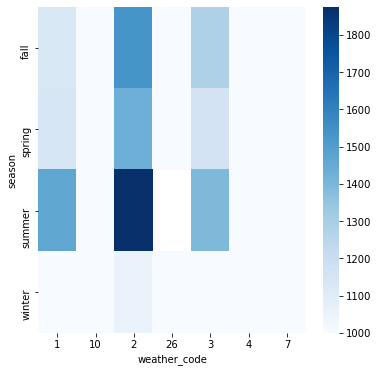

In [19]:
heatmap1_data = pd.pivot_table(df_tmp, values='shared_counts', 
                     index=['season'], 
                     columns='weather_code')
                    

sns.heatmap(heatmap1_data, vmin=1000, cmap="Blues")

plt.show()

> * Bike sharing is most popular when it is summer with scattered clouds or few clouds. 
> * In addition, bike sharing is very popular when it is summer or the weather is clear

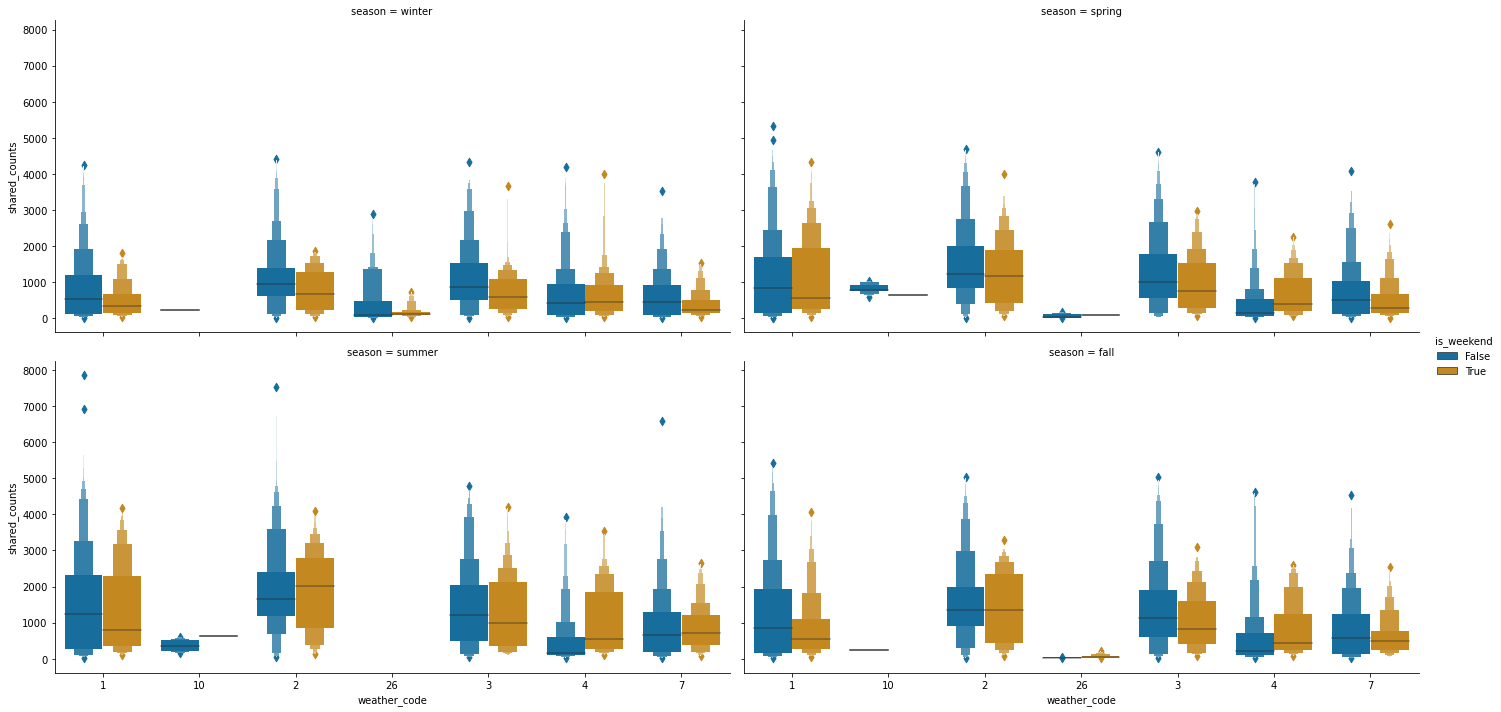

In [20]:
sns.catplot(
    x='weather_code', 
    y='shared_counts', 
    data=df_tmp, 
    kind='boxen', 
    col='season', 
    palette=current_palette,
    hue='is_weekend',
    col_wrap=2,
    height=5,
    aspect=2
)

plt.show()

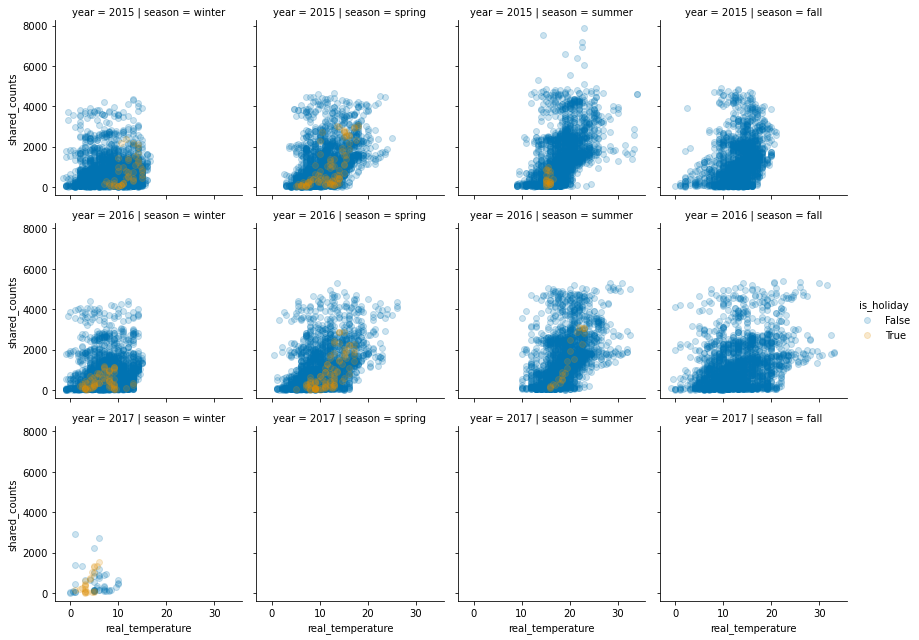

In [21]:
g = sns.FacetGrid(df, row='year', col='season', hue='is_holiday')
g = g.map(plt.scatter, 'real_temperature', 'shared_counts', alpha = 0.2).add_legend()

plt.show()

> People do not usually use shared bikes on holiday, especially holiday in fall

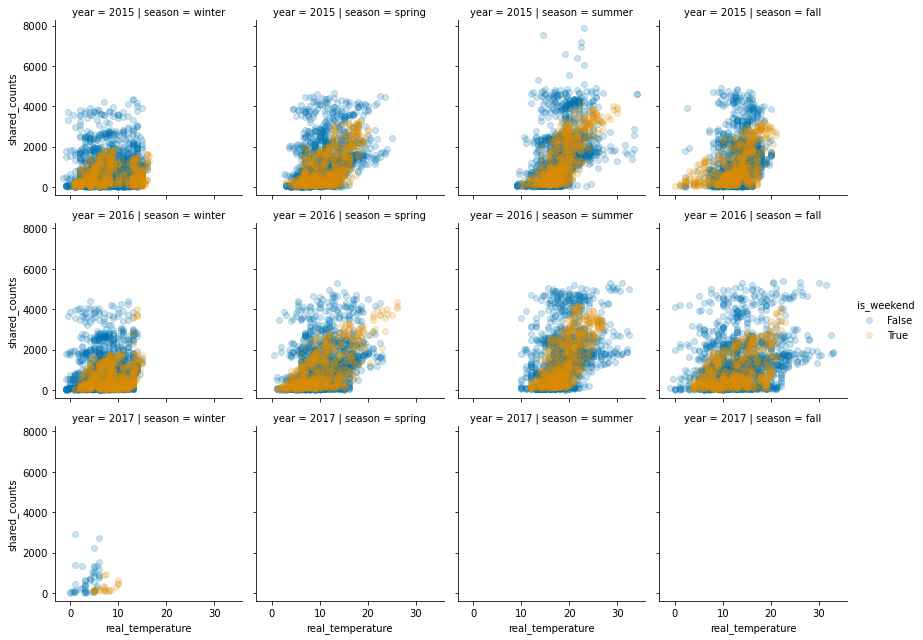

In [22]:
g = sns.FacetGrid(df, row='year', col='season', hue='is_weekend')
g = g.map(plt.scatter, 'real_temperature', 'shared_counts', alpha = 0.2).add_legend()

plt.show()

> * In fall 2016, a lot more people use shared bikes on weekdays.
> * Shared counts of a certain bike reaches its highest on days in summer 2015
> * More people use shared bikes for work than leisure.
> * Compared to fall 2016, there is less bike sharing on fall 2015
> * Most bike sharings happen when temperature is between 0 - 15(spring & winter), 10 - 20(summer & fall)
> * The distribution of bike sharings as a result of real temperature is not influenced by whether it is weekend or holiday

In [ ]:
g = sns.FacetGrid(df_tmp, row='year', col='season', hue='is_weekend')
g = g.map(plt.scatter, 'humidity', 'shared_counts', alpha = 0.2).add_legend()

plt.show()

> * The distribution of bike sharings resulting from real temperature is dfferent from the one caused by humidity.

In [ ]:
g = sns.FacetGrid(df_tmp, row='year', col='season', hue='is_weekend')
g = g.map(plt.scatter, 'wind_speed', 'shared_counts', alpha = 0.2).add_legend()

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * Most bike sharings happened when
>    * Wind speed: 5 ~ 20 km/h
>    * Real temperature: 8 - 18 Celcius
>    * Humidity: 70.5% - 90.5%
> * People often use shared bikes on weekdays or when the weather is nice.

### Were there any interesting or surprising interactions between features?

> * Wind speed, humidity and real temperature causes different distributions of shared counts
> * The distribution of shared counts is slightly varied over the years even though it is compared with the same season
> * The weather conditions have a greater impact on the distribution of shared counts than other factors, including whether it is holiday or not and whether it is weekend or not